In [55]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
import pickle
import random


In [2]:
with open('project/data/listings_final.pickle', 'rb') as read_file:
    listings_all = pickle.load(read_file)
    
listings_all.head()

,url,property_name,type_desc,price,reviews,num_reviews,num_guets,num_bedrooms,num_baths,num_beds,...,host_status,response_rate,region,state,TV,Free_Parking,Wifi,Kitchen,Heating,Air_conditioning
0,https://www.airbnb.com/rooms/10012754?check_in...,Tahoe Stonehenge,Entire house,918.0,4.90,110.0,12.0,5.0,5.0,5.0,...,Superhost,100.0,South Lake Tahoe,California,1,1,1,1,1,0
1,https://www.airbnb.com/rooms/10039236?check_in...,Vidor Village and Family Retreat #322,Entire condominium,262.0,4.00,16.0,11.0,3.0,3.0,3.0,...,Host,100.0,Kings Beach,California,1,1,1,1,1,0
2,https://www.airbnb.com/rooms/10041987?check_in...,Comfortable Lake Tahoe Charmer w/ Hot Tub,Entire house,385.0,4.77,123.0,8.0,4.0,4.0,4.0,...,Host,100.0,South Lake Tahoe,California,1,1,1,1,1,0
3,https://www.airbnb.com/rooms/10052096?check_in...,Northstar Cabin - Summer access to pool and te...,Entire house,375.0,4.75,48.0,9.0,4.0,4.0,4.0,...,Superhost,100.0,Truckee,California,1,1,1,1,0,0
4,https://www.airbnb.com/rooms/10340660?check_in...,"Quiet Mountain cabin, Donner Lake.",Entire cabin,300.0,4.86,104.0,6.0,3.0,3.0,3.0,...,Superhost,100.0,Truckee,California,1,0,1,1,0,0


In [3]:
#Clean up regions
def region_cleaned(region):
    if region == 'kirkwood':
        return 'Kirkwood'
    elif region == 'INCLINE VILLAGE':
        return 'Incline Village'
    elif region == 'Olympic valley':
        return "Olympic Valley"
    else: return region

In [4]:
listings_all['region_cleaned'] = listings_all['region'].apply(region_cleaned)
listings_all.drop(columns ='region', inplace = True)

In [5]:
listings_allv1 = listings_all[(listings_all['cleanliness'].notnull()) &
                              (listings_all['num_reviews'].notnull()) &
                              (listings_all['response_rate'].notnull())]

In [6]:
listings_allv1.describe()

,price,reviews,num_reviews,num_guets,num_bedrooms,num_baths,num_beds,cleanliness,accuracy,communication,location,checkin,value,response_rate,TV,Free_Parking,Wifi,Kitchen,Heating,Air_conditioning
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000
mean,338.648268,4.703820,40.262987,6.425325,2.459957,2.512987,2.512987,4.741883,4.783766,4.808766,4.896861,4.853571,4.600108,97.401515,0.966450,0.884199,0.984848,0.939394,0.600649,0.159091
std,224.183639,0.309223,55.518409,2.793711,1.259210,1.172474,1.172474,0.277485,0.264957,0.272501,0.131583,0.247322,0.305227,8.396592,0.180165,0.320159,0.122222,0.238736,0.490030,0.365959
min,30.000000,2.670000,3.000000,1.000000,0.000000,1.000000,1.000000,2.900000,2.700000,2.300000,4.000000,2.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199.000000,4.600000,10.000000,4.000000,1.000000,1.000000,1.000000,4.700000,4.700000,4.700000,4.800000,4.800000,4.500000,99.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,295.500000,4.780000,22.000000,6.000000,3.000000,3.000000,3.000000,4.800000,4.900000,4.900000,4.900000,4.900000,4.700000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,420.000000,4.920000,46.000000,8.000000,3.000000,3.000000,3.000000,4.900000,5.000000,5.000000,5.000000,5.000000,4.800000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,2000.000000,5.000000,561.000000,16.000000,8.000000,8.000000,8.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
listings_allv1 = listings_allv1[listings_all['price'] < 600] #remove extreme high price values

<ipython-input-7-3d29595bdffa>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listings_allv1 = listings_allv1[listings_all['price'] < 600] #remove extreme high price values


In [8]:
#Remapping property types
def type_remapping(type_desc):
    if "Entire house" in type_desc:
        return "House"
    elif "Entire apartment" in type_desc:
        return "Apartment"
    elif "Entire serviced apartment" in type_desc:
        return "Apartment"
    elif "Entire townhouse" in type_desc:
        return "House"
    elif "Entire loft" in type_desc:
        return "Apartment"
    elif "cottage" in type_desc:
        return "House"
    elif "Entire chalet" in type_desc:
        return "House"
    elif "Entire condominium" in type_desc:
        return "Condominium"
    else:
        return type_desc

In [9]:
listings_allv1['type_desc_remapping'] = listings_allv1['type_desc'].map(lambda x: type_remapping(x))

In [10]:
# Regroup property types into three major categories to reduce the number of features
listings_allv1.loc[~listings_allv1.type_desc_remapping.isin(["House","Condominium"]), "type_desc_remapping"] = "Other_Type"

In [11]:
listings_allv1.type_desc_remapping.value_counts()

House          379
Other_Type     272
Condominium    196
Name: type_desc_remapping, dtype: int64

In [12]:
type_dummies = pd.get_dummies(listings_allv1['type_desc_remapping'])

In [13]:
listings_allv1 = listings_allv1.join(type_dummies)
listings_allv1.drop(columns = ['Other_Type'], inplace = True)

In [14]:
identify_dummies = pd.get_dummies(listings_allv1['identify_verify'])
listings_allv1 = listings_allv1.join(identify_dummies)

listings_allv1.drop(columns = ['Not Verified'], inplace = True)

In [15]:
host_status_dummies = pd.get_dummies(listings_allv1['host_status'])
listings_allv1 = listings_allv1.join(host_status_dummies)

listings_allv1.drop(columns = ['Host'], inplace = True)

In [16]:
listings_allv1['region_cleaned'].value_counts()

Truckee                 259
South Lake Tahoe        111
Incline Village         102
Reno                     86
Olympic Valley           53
Tahoe City               50
Kings Beach              40
Carnelian Bay            31
Tahoe Vista              27
Kirkwood                 22
Stateline                15
Alpine Meadows            7
Soda Springs              5
Sparks                    5
Homewood                  5
NorthStar-Truckee         4
Carson City               3
Glenbrook                 3
Tahoma                    3
Markleeville              3
Sun Valley                2
Zephyr Cove               2
Sunnyside-Tahoe City      1
Placer County             1
Virginia City             1
Dayton                    1
Stagecoach                1
Genoa                     1
Donner Lake               1
Squaw Valley              1
Loyalton                  1
Name: region_cleaned, dtype: int64

In [17]:
by_lake = ['South Lake Tahoe','Kings Beach', 'Carnelian Bay', 'Tahoe City','Incline Village', 'Stateline', 'Tahoe Vista', 'Zephyr Cove', 'Tahoma', 'Sunnyside-Tahoe City', 'Dayton', 'Glenbrook','Placer County', 'Homewood']

In [18]:
listings_allv1["neigborhood"] = np.where(listings_allv1["region_cleaned"].isin(by_lake), "By_lake_neighbor", "Other_neighbor")

In [19]:
neigbor_dummies = pd.get_dummies(listings_allv1['neigborhood'])
listings_allv1 = listings_allv1.join(neigbor_dummies)
listings_allv1.drop(columns = ['Other_neighbor'], inplace = True)

In [20]:
listings_allv1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 1 to 1376
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  847 non-null    object 
 1   property_name        847 non-null    object 
 2   type_desc            847 non-null    object 
 3   price                847 non-null    float64
 4   reviews              847 non-null    float64
 5   num_reviews          847 non-null    float64
 6   num_guets            847 non-null    float64
 7   num_bedrooms         847 non-null    float64
 8   num_baths            847 non-null    float64
 9   num_beds             847 non-null    float64
 10  cleanliness          847 non-null    float64
 11  accuracy             847 non-null    float64
 12  communication        847 non-null    float64
 13  location             847 non-null    float64
 14  checkin              847 non-null    float64
 15  value                847 non-null    fl

In [21]:
regions_count = listings_allv1['region_cleaned'].value_counts()
region_others = list(regions_count[regions_count <= 8].index)

listings_allv1['region'] = listings_allv1['region_cleaned'].replace(region_others, 'Other_regions')

In [22]:
region_dummies = pd.get_dummies(listings_allv1['region'])
listings_allv1 = listings_allv1.join(region_dummies)
listings_allv1.drop(columns = ['Stateline'], inplace = True)

In [23]:
listings_allv1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 1 to 1376
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  847 non-null    object 
 1   property_name        847 non-null    object 
 2   type_desc            847 non-null    object 
 3   price                847 non-null    float64
 4   reviews              847 non-null    float64
 5   num_reviews          847 non-null    float64
 6   num_guets            847 non-null    float64
 7   num_bedrooms         847 non-null    float64
 8   num_baths            847 non-null    float64
 9   num_beds             847 non-null    float64
 10  cleanliness          847 non-null    float64
 11  accuracy             847 non-null    float64
 12  communication        847 non-null    float64
 13  location             847 non-null    float64
 14  checkin              847 non-null    float64
 15  value                847 non-null    fl

In [24]:
columns = ['reviews','num_reviews','num_guets','num_bedrooms','num_baths','num_beds',
            'cleanliness','accuracy','communication','location','checkin',
            'value','response_rate','TV','Free_Parking','Wifi','Kitchen','Heating', 'Air_conditioning',
            'Identity verified','Superhost','House','Condominium','By_lake_neighbor','Carnelian Bay','Incline Village',
            'Kings Beach','Kirkwood','Olympic Valley','Other_regions','Reno','South Lake Tahoe','Tahoe City','Tahoe Vista',
            'Truckee','price']

listings_allv1 = listings_allv1[columns]

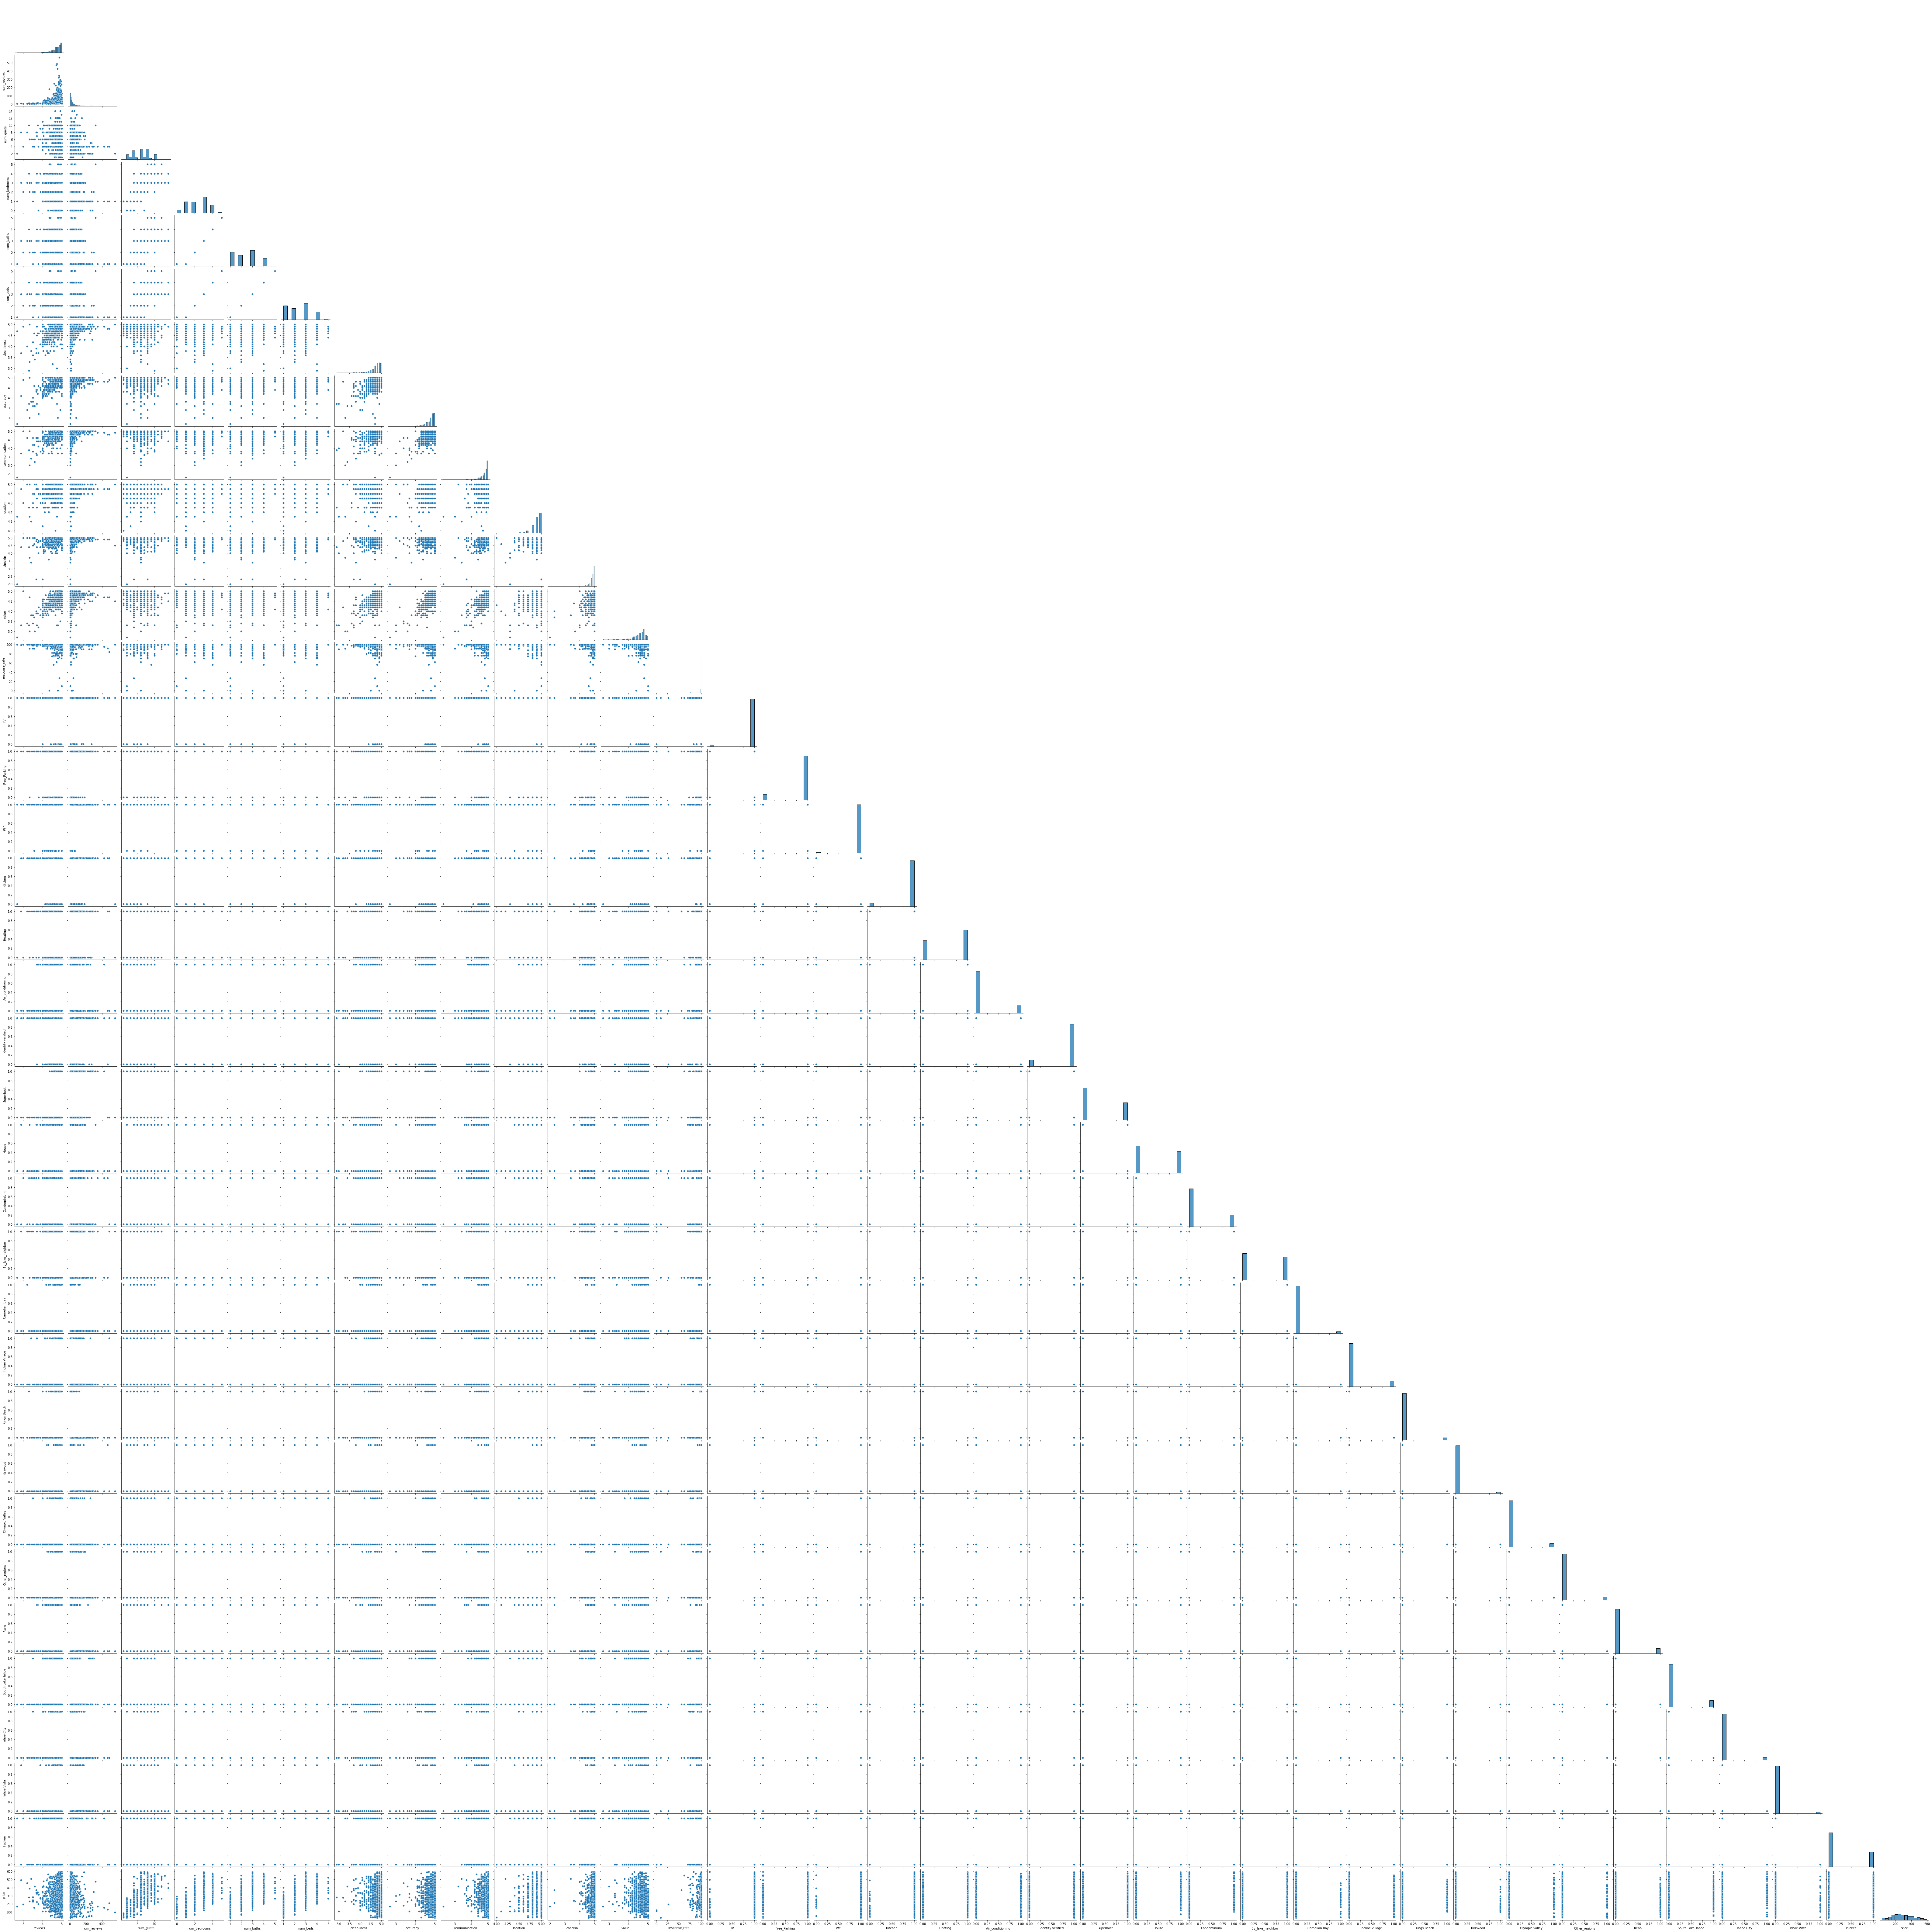

In [25]:
sns.pairplot(listings_allv1, corner = True)

In [27]:
corr_df = listings_allv1.corr()
corr_df

,reviews,num_reviews,num_guets,num_bedrooms,num_baths,num_beds,cleanliness,accuracy,communication,location,...,Kings Beach,Kirkwood,Olympic Valley,Other_regions,Reno,South Lake Tahoe,Tahoe City,Tahoe Vista,Truckee,price
reviews,1.000000,0.192528,-0.042090,-0.047881,-0.042715,-0.042715,0.590425,0.677779,0.645700,0.344359,...,-0.012657,0.030004,0.026194,0.061842,0.006623,0.001151,-0.030000,-0.037483,-0.061905,0.017179
num_reviews,0.192528,1.000000,-0.183905,-0.202955,-0.210606,-0.210606,0.138042,0.133529,0.184430,0.054352,...,-0.066249,0.063047,-0.003310,0.043851,-0.067505,0.022261,0.022015,0.029371,-0.040130,-0.204061
num_guets,-0.042090,-0.183905,1.000000,0.846281,0.857561,0.857561,-0.114963,-0.056154,-0.074823,0.031512,...,-0.010676,-0.102646,-0.006008,-0.046767,-0.046663,0.015499,0.031865,0.006312,0.077596,0.710544
num_bedrooms,-0.047881,-0.202955,0.846281,1.000000,0.982162,0.982162,-0.096849,-0.029884,-0.060656,0.008507,...,-0.028746,-0.139909,-0.022078,-0.053440,-0.050210,0.008019,0.045299,0.006678,0.094223,0.709722
num_baths,-0.042715,-0.210606,0.857561,0.982162,1.000000,1.000000,-0.109577,-0.027696,-0.062427,0.019263,...,-0.022600,-0.106060,-0.019810,-0.048734,-0.054528,0.010593,0.035890,0.003775,0.095431,0.719447
num_beds,-0.042715,-0.210606,0.857561,0.982162,1.000000,1.000000,-0.109577,-0.027696,-0.062427,0.019263,...,-0.022600,-0.106060,-0.019810,-0.048734,-0.054528,0.010593,0.035890,0.003775,0.095431,0.719447
cleanliness,0.590425,0.138042,-0.114963,-0.096849,-0.109577,-0.109577,1.000000,0.602851,0.517833,0.264998,...,-0.017406,0.016943,0.056763,0.057244,0.028304,-0.027717,-0.046762,-0.034212,-0.052230,-0.037256
accuracy,0.677779,0.133529,-0.056154,-0.029884,-0.027696,-0.027696,0.602851,1.000000,0.687328,0.433839,...,-0.022346,0.034158,0.037358,0.057443,0.009326,-0.035460,-0.016357,-0.045934,-0.033487,0.010105
communication,0.645700,0.184430,-0.074823,-0.060656,-0.062427,-0.062427,0.517833,0.687328,1.000000,0.346874,...,-0.015078,0.040285,0.031335,0.044494,-0.017303,0.032195,0.000093,-0.041074,-0.077230,-0.044043
location,0.344359,0.054352,0.031512,0.008507,0.019263,0.019263,0.264998,0.433839,0.346874,1.000000,...,-0.034873,0.052625,0.042053,0.049767,-0.074200,-0.001735,0.019931,-0.046439,0.002160,0.093817


### Iteration 1: Base

In [77]:
features = ['reviews','num_reviews','num_guets','num_bedrooms','num_baths','num_beds',
            'cleanliness','accuracy','communication','location','checkin',
            'value','response_rate','TV','Free_Parking','Wifi','Kitchen','Heating', 'Air_conditioning',
            'Identity verified','Superhost','House','Condominium','By_lake_neighbor','Carnelian Bay','Incline Village',
            'Kings Beach','Kirkwood','Olympic Valley','Other_regions','Reno','South Lake Tahoe','Tahoe City','Tahoe Vista',
            'Truckee']


y = listings_allv1['price']
X = listings_allv1[features]

In [78]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.25, random_state = 40)

In [79]:
#fit model
lr_model_1 = LinearRegression()
lr_model_1.fit(X_train, y_train)

#Scores
train_score = lr_model_1.score(X_train, y_train)
val_score = lr_model_1.score(X_val, y_val)

#Adj R2
adjusted_r2 = 1 - (1-lr_model_1.score(X_val, y_val))*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)

In [80]:
#print outputs
print('\nTrain R^2 score was:', train_score)
print('\nValidation R^2 score was:', val_score)
print('\nValidation adjusted R^2 was:',adjusted_r2)
print('\nFeature coefficient results: \n')
for feature, coef in zip(X_train.columns, lr_model_1.coef_):
    print(feature, ':', f'{coef:.2f}') 


Train R^2 score was: 0.6177649380596315

Validation R^2 score was: 0.5860197469927415

Validation adjusted R^2 was: 0.4778905764311442

Feature coefficient results: 

reviews : 36.49
num_reviews : -0.13
num_guets : 17.84
num_bedrooms : 2.25
num_baths : 20.03
num_beds : 20.03
cleanliness : 22.93
accuracy : 53.72
communication : -19.77
location : 68.84
checkin : 16.95
value : -66.43
response_rate : 0.17
TV : 30.12
Free_Parking : 12.61
Wifi : 48.06
Kitchen : 17.26
Heating : 5.57
Air_conditioning : 1.91
Identity verified : 6.30
Superhost : 3.01
House : 19.30
Condominium : 15.96
By_lake_neighbor : 7.89
Carnelian Bay : -34.27
Incline Village : 9.01
Kings Beach : 8.56
Kirkwood : -13.63
Olympic Valley : 6.87
Other_regions : 16.24
Reno : -5.89
South Lake Tahoe : -0.96
Tahoe City : 36.71
Tahoe Vista : -35.35
Truckee : 10.56


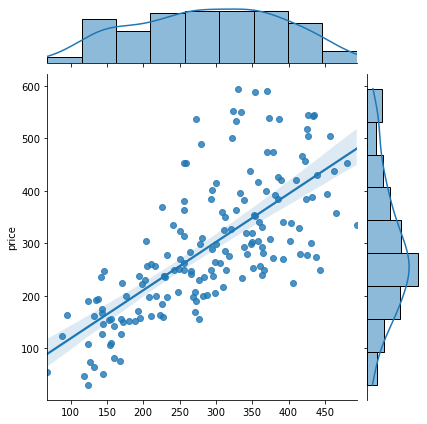

In [81]:
preds = lr_model_1.predict(X_test)

sns.jointplot(x=preds,y=y_test, kind='reg')

In [82]:
#RMSE
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

RMSE(y_test,preds)

89.56309517361838

In [83]:
import scipy.stats as stats

Text(0.5, 1.0, 'Normal Q-Q plot')

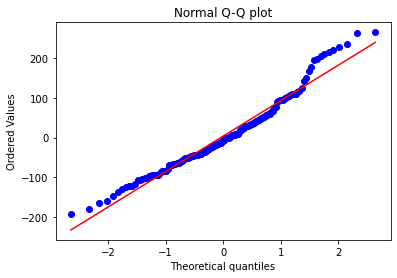

In [84]:
res = y_test - preds

stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

Text(0, 0.5, 'residuals')

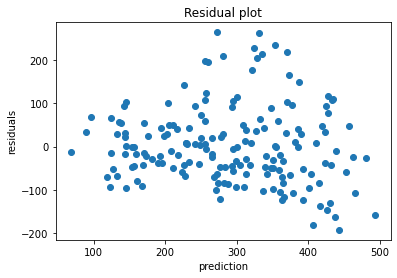

In [85]:
plt.scatter(preds, res)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")

### Final Model

In [86]:
X3_train = X_train.copy()
y3_train = y_train.copy()
X3_val = X_val.copy()
y3_val = y_val.copy()
X3_test = X_test.copy()
y3_test = y_test.copy()

In [87]:
#Create a combo score of cleanliness,accuracy,communication and value to reduce collinearity
X3_train['score_combo'] = np.mean(X_train[['cleanliness','accuracy','communication','value','checkin']], axis = 1)
X3_val['score_combo'] = np.mean(X_val[['cleanliness','accuracy','communication','value','checkin']], axis = 1)
X3_test['score_combo'] = np.mean(X_test[['cleanliness','accuracy','communication','value','checkin']], axis = 1)

In [88]:
features = ['num_guets','num_bedrooms','num_baths','num_beds',
            'location','score_combo','response_rate','TV','Free_Parking','Wifi','Kitchen','Heating', 'Air_conditioning',
            'Identity verified','Superhost','House','Condominium','By_lake_neighbor']


X3_train = X3_train[features]
X3_val = X3_val[features]


In [182]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

In [183]:
X, y = np.array(X3_train), np.array(y3_train)

In [188]:
kf = KFold(n_splits=5, shuffle=True, random_state = 20)
cv_lm_r2s, cv_lm_lasso_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_lasso = LassoCV()

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val).round(3))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_lasso.fit(X_train_scaled, y_train)
    cv_lm_lasso_r2s.append(lm_lasso.score(X_val_scaled, y_val).round(3))

print(f'Simple scores: \t{cv_lm_r2s}')
print(f'Lasso scores: \t{cv_lm_lasso_r2s} \n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Lasso mean cv r^2: {np.mean(cv_lm_lasso_r2s):.3f} +- {np.std(cv_lm_lasso_r2s):.3f}')

Simple scores: 	[0.531, 0.481, 0.541, 0.615, 0.547]
Lasso scores: 	[0.537, 0.501, 0.529, 0.619, 0.558] 

Simple mean cv r^2: 0.543 +- 0.043
Lasso mean cv r^2: 0.549 +- 0.040


Lasso shows slightly higher R^2

### Lasso

In [189]:
scaler = StandardScaler()
X3_train_scaled = scaler.fit_transform(X3_train)
X3_val_scaled = scaler.transform(X3_val)

In [190]:
#Create the model
lasso = LassoCV()
lasso.fit(X3_train_scaled,y3_train)
lasso.score(X3_train_scaled,y3_train)

0.5765961299287035

In [191]:
# Score on validation set
lasso.score(X3_val_scaled, y3_val)

0.592375458306478

In [192]:
X3_test = X3_test[features]

''

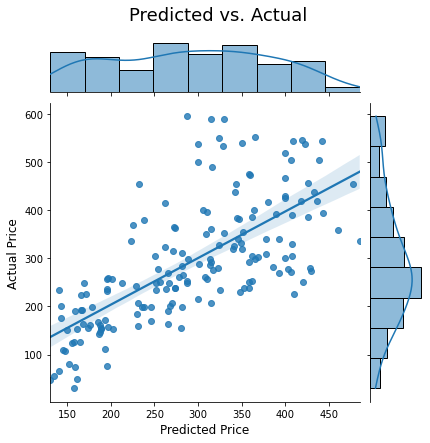

In [193]:
X3_test_scaled = scaler.transform(X3_test)
preds3_lasso = lasso.predict(X3_test_scaled)

h = sns.jointplot(x=preds3_lasso,y=y3_test, kind='reg')

h.set_axis_labels('Predicted Price', 'Actual Price', fontsize=12)

h.fig.suptitle('Predicted vs. Actual',fontsize=18)
h.fig.subplots_adjust(top=0.90)
;

In [194]:
#Calculate RMSE
RMSE(y3_test,preds3_lasso)

91.69311189296039

Text(0.5, 1.0, 'Normal Q-Q plot')

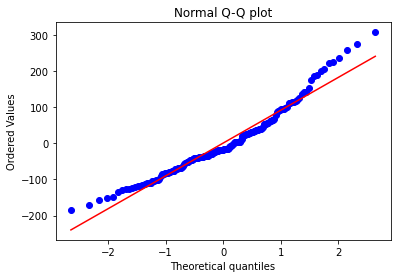

In [195]:
res3_lasso = y3_test - preds3_lasso

stats.probplot(res3_lasso, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

Text(0, 0.5, 'residuals')

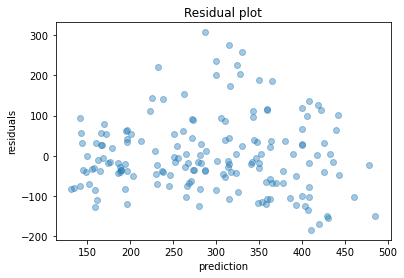

In [196]:
plt.scatter(preds3_lasso, res3_lasso, alpha=0.4)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")

In [198]:
list(zip(X3_train.columns,lasso.coef_))

[('num_guets', 44.79569094212705),
 ('num_bedrooms', 3.259816014796283),
 ('num_baths', 43.09986320419804),
 ('num_beds', 6.691154314818584e-13),
 ('location', 8.852238188471354),
 ('score_combo', 1.7920572684629603),
 ('response_rate', 0.0),
 ('TV', 3.9677247758031804),
 ('Free_Parking', 0.0),
 ('Wifi', 0.1187225959383858),
 ('Kitchen', 0.7614778921149886),
 ('Heating', 0.0),
 ('Air_conditioning', 0.0),
 ('Identity verified', 0.0),
 ('Superhost', 0.0),
 ('House', 7.472585650430722),
 ('Condominium', 0.0),
 ('By_lake_neighbor', 0.0)]

### Try regular linear regression

In [120]:
#fit model
lr_model_3 = LinearRegression()
lr_model_3.fit(X3_train, y3_train)

#Scores
train_score3 = lr_model_3.score(X3_train, y3_train)
val_score3 = lr_model_3.score(X3_val, y3_val)

In [121]:
#print features
print('Feature coefficient results: \n')
for feature, coef in zip(X3_train.columns, lr_model_3.coef_):
    print(feature, ':', f'{coef:.2f}') 

Feature coefficient results: 

num_guets : 17.18
num_bedrooms : 3.41
num_baths : 20.49
num_beds : 20.49
location : 86.99
score_combo : 23.86
response_rate : 0.38
TV : 34.27
Free_Parking : 11.75
Wifi : 34.33
Kitchen : 10.20
Heating : 6.81
Air_conditioning : 7.43
Identity verified : 12.69
Superhost : 0.09
House : 28.57
Condominium : 20.87
By_lake_neighbor : 4.87


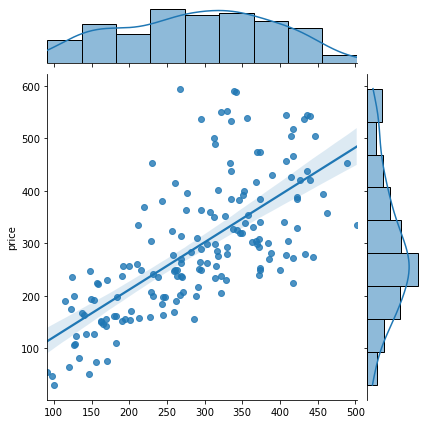

In [122]:
X3_test = X3_test[features]

preds3 = lr_model_3.predict(X3_test)

sns.jointplot(x=preds3,y=y3_test, kind='reg');

In [123]:
#Calculate RMSE
RMSE(y3_test,preds3)

91.75102971305421

In [124]:
import scipy.stats as stats

Text(0.5, 1.0, 'Normal Q-Q plot')

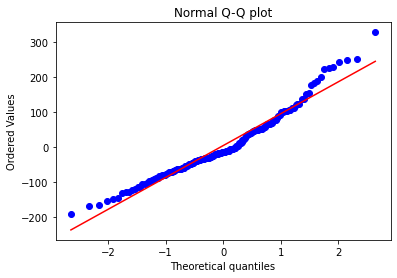

In [125]:
res3 = y3_test - preds3

stats.probplot(res3, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")

Text(0, 0.5, 'residuals')

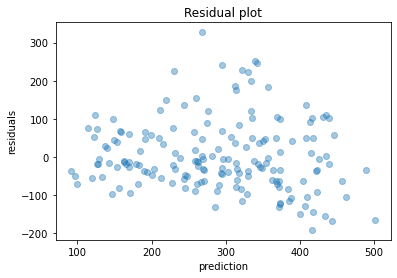

In [180]:
plt.scatter(preds3, res3,alpha = 0.4)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")
    